# 🗞️ Fake News Classifier - NLP Mini Project

**Goal:** To build a machine learning model that can identify if a news headline is real or fake.

# **🗂️ 01_EDA.ipynb: Fake News Dataset Exploration**

## **📑 Table of Contents**
1.  [🎯 Introduction & Objectives](#-1-introduction--objectives)
2.  [⚙️ Setup & Data Loading](#-2-setup--data-loading)
3.  [🔍 Initial Dataset Overview](#-3-initial-dataset-overview)
    *   [3.1. Main Dataset First Look](#31-main-dataset-first-look)
    *   [3.2. Validation Dataset First Look](#32-validation-dataset-first-look)
4.  [🎯 Target Variable Analysis: `label`](#-4-target-variable-analysis-label)
    *   [4.1. Main Dataset Label Distribution](#41-main-dataset-label-distribution)
    *   [4.2. Validation Dataset Label Check](#42-validation-dataset-label-check)
5.  [📊 Categorical Variable Analysis: `subject`](#-5-categorical-variable-analysis-subject)
    *   [5.1. Main Dataset Subject Analysis](#51-main-dataset-subject-analysis)
    *   [5.2. Validation Dataset Subject Comparison](#52-validation-dataset-subject-comparison)
6.  [📝 Text Analysis: `title` and `text` Columns](#-6-text-analysis-title-and-text-columns)
    *   [6.1. Text Length Analysis](#61-text-length-analysis)
    *   [6.2. Word Frequency Analysis](#62-word-frequency-analysis)
    *   [6.3. Text Quality Check](#63-text-quality-check)
7.  [📅 Date Analysis](#-7-date-analysis)
    *   [7.1. Main Dataset Date Analysis](#71-main-dataset-date-analysis)
    *   [7.2. Validation Dataset Date Check](#72-validation-dataset-date-check)
8.  [💡 Key Findings & Recommendations](#-8-key-findings--recommendations)

---


<a id='introduction'></a>

## **🎯 1. Introduction & Objectives**

**Goal:** This notebook aims to explore and understand the structure, patterns, and potential issues within the fake/real news dataset. A thorough EDA is crucial for informing our data cleaning and feature engineering steps.

**Key Questions:**
-   How is our target variable (`label`) distributed?
-   What are the characteristics of the `title` and `text` columns?
-   Does the `subject` of the news relate to whether it is fake or real?
-   Is the `date` column valid and useful?
-   Does the validation dataset have the same structure and require the same cleaning?

[🔝 Back to Top](#-fake-news-dataset-exploration)

---

<a id='setup'></a>

## **⚙️ 2. Setup & Data Loading**

*This is where you'll write the code to import libraries and load the datasets.*


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

import sys
import os

In [32]:
# Setup visualization style
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the datasets
print("Loading main dataset...")
df = pd.read_csv('../dataset/00_raw/data.csv')
print("Loading validation dataset...")
val_df = pd.read_csv('../dataset/00_raw/validation_data.csv')

Loading main dataset...
Loading validation dataset...



[🔝 Back to Top](#-01_edainb-fake-news-dataset-exploration)



---

## **🔍 3. Initial Dataset Overview**

### **3.1. Main Dataset First Look**
*Let's examine the basic structure of our primary dataset.*


In [33]:
# Basic info
print("MAIN DATASET INFO:")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:")
display(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

MAIN DATASET INFO:
Shape: (39942, 5)

Columns: ['label', 'title', 'text', 'subject', 'date']

Data types:
 label       int64
title      object
text       object
subject    object
date       object
dtype: object

First 5 rows:


,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"



Missing values:
 label      0
title      0
text       0
subject    0
date       0
dtype: int64

Duplicate rows: 201


In [34]:
# Quick exploration of the main dataset
print("First few dataset for train/test rows:")
display(df.head())

First few dataset for train/test rows:


,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### **3.2. Validation Dataset First Look**
*Now let's check if the validation data has the same structure.*

In [35]:
# Basic info
print("VALIDATION DATASET INFO:")
print("Shape:", val_df.shape)
print("\nColumns:", val_df.columns.tolist())
print("\nData types:\n", val_df.dtypes)
print("\nFirst 5 rows:")
display(val_df.head())
print("\nMissing values:\n", val_df.isnull().sum())
print("\nDuplicate rows:", val_df.duplicated().sum())

# Check the placeholder label in validation set
print("\nValidation label values:", val_df['label'].unique())

VALIDATION DATASET INFO:
Shape: (4956, 5)

Columns: ['label', 'title', 'text', 'subject', 'date']

Data types:
 label       int64
title      object
text       object
subject    object
date       object
dtype: object

First 5 rows:


,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"



Missing values:
 label      0
title      0
text       0
subject    0
date       0
dtype: int64

Duplicate rows: 8

Validation label values: [2]


In [36]:
display(val_df.head())

,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"


### 3.3 Duplicates analysis

In [37]:
# Add this to your EDA notebook
print("🔍 Checking for duplicates...")

# Check for exact duplicates
print("Exact duplicates in training data:")
print(f"Total rows: {len(df)}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Percentage: {df.duplicated().mean():.2%}")

# Check for near-duplicates (same text but different labels - dangerous!)
print("\n⚠️ Checking for text duplicates with different labels:")
text_duplicates = df.duplicated(subset=['title', 'text'], keep=False)
if text_duplicates.any():
    duplicate_groups = df[text_duplicates].groupby(['title', 'text'])['label'].nunique()
    conflicting_labels = duplicate_groups[duplicate_groups > 1]
    print(f"Text duplicates with conflicting labels: {len(conflicting_labels)}")
    
    # Show examples
    print("Examples of conflicting labels:")
    for (title, text), _ in conflicting_labels.head(3).items():
        conflicts = df[(df['title'] == title) & (df['text'] == text)]
        print(f"Title: {title[:50]}...")
        print(f"Labels: {conflicts['label'].tolist()}")
        print("---")

# Check validation data too
print("\nValidation data duplicates:")
print(f"Total rows: {len(val_df)}")
print(f"Duplicate rows: {val_df.duplicated().sum()}")
print(f"Percentage: {val_df.duplicated().mean():.2%}")

🔍 Checking for duplicates...
Exact duplicates in training data:
Total rows: 39942
Duplicate rows: 201
Percentage: 0.50%

⚠️ Checking for text duplicates with different labels:
Text duplicates with conflicting labels: 0
Examples of conflicting labels:

Validation data duplicates:
Total rows: 4956
Duplicate rows: 8
Percentage: 0.16%


In [38]:
## 🔍 COMPREHENSIVE DUPLICATE ANALYSIS
print("🔍 COMPREHENSIVE DUPLICATE ANALYSIS")
print("=" * 60)

def analyze_duplicates(df, dataset_name="Training"):
    """Analyze duplicates across all columns"""
    print(f"\n📊 {dataset_name} Data Duplicate Analysis")
    print("=" * 50)

    total_rows = len(df)
    print(f"Total rows: {total_rows}")

    # 1. Exact duplicates (all columns same)
    exact_duplicates = df.duplicated().sum()
    print(f"\n1. Exact duplicates (all columns): {exact_duplicates} ({exact_duplicates/total_rows:.2%})")

    # 2. Check each column individually for duplicates
    print(f"\n2. Column-wise duplicate analysis:")
    print("-" * 40)
    for column in df.columns:
        if df[column].dtype == 'object' or pd.api.types.is_string_dtype(df[column]):
            # For text columns, check for duplicates
            dup_count = df[column].duplicated().sum()
            unique_count = df[column].nunique()
            print(f"   {column:20}: {dup_count:4} duplicates ({dup_count/total_rows:6.2%}) | {unique_count:4} unique values")
        else:
            # For numeric columns
            dup_count = df[column].duplicated().sum()
            unique_count = df[column].nunique()
            print(f"   {column:20}: {dup_count:4} duplicates ({dup_count/total_rows:6.2%}) | {unique_count:4} unique values")

    # 3. Check for dangerous duplicates (same content, different labels)
    print(f"\n3. Dangerous duplicates analysis:")
    print("-" * 40)

    # Same title, different labels
    title_duplicates = df.duplicated(subset=['title'], keep=False)
    if title_duplicates.any():
        title_conflicts = df[title_duplicates].groupby('title')['label'].nunique()
        title_conflicts = title_conflicts[title_conflicts > 1]
        print(f"   Same title, different labels: {len(title_conflicts)} cases")

        if len(title_conflicts) > 0:
            print("   Examples:")
            for title in title_conflicts.index[:3]:
                conflicts = df[df['title'] == title]
                print(f"     Title: '{title[:50]}...'")
                print(f"     Labels: {conflicts['label'].tolist()}")

    # Same text, different labels
    text_duplicates = df.duplicated(subset=['text'], keep=False)
    if text_duplicates.any():
        text_conflicts = df[text_duplicates].groupby('text')['label'].nunique()
        text_conflicts = text_conflicts[text_conflicts > 1]
        print(f"   Same text, different labels: {len(text_conflicts)} cases")

    # Same title + text, different labels (should never happen!)
    title_text_duplicates = df.duplicated(subset=['title', 'text'], keep=False)
    if title_text_duplicates.any():
        title_text_conflicts = df[title_text_duplicates].groupby(['title', 'text'])['label'].nunique()
        title_text_conflicts = title_text_conflicts[title_text_conflicts > 1]
        print(f"   ⚠️  SAME TITLE+TEXT, DIFFERENT LABELS: {len(title_text_conflicts)} CRITICAL ISSUES!")

        if len(title_text_conflicts) > 0:
            print("   Critical examples:")
            for (title, text), _ in title_text_conflicts.head(3).items():
                conflicts = df[(df['title'] == title) & (df['text'] == text)]
                print(f"     Title: '{title[:30]}...'")
                print(f"     Labels: {conflicts['label'].tolist()}")
                print(f"     Subjects: {conflicts['subject'].tolist()}")

    # 4. Most duplicated content
    print(f"\n4. Most duplicated content:")
    print("-" * 40)

    # Find most duplicated titles
    title_counts = df['title'].value_counts()
    if len(title_counts) > 0:
        print(f"   Most duplicated title: '{title_counts.index[0][:50]}...'")
        print(f"   Appears {title_counts.iloc[0]} times")

    # Find most duplicated texts
    text_counts = df['text'].value_counts()
    if len(text_counts) > 0:
        print(f"   Most duplicated text: appears {text_counts.iloc[0]} times")

    return exact_duplicates

# Analyze training data
train_duplicates = analyze_duplicates(df, "Training")

# Analyze validation data
if 'validation_data.csv' in os.listdir('../dataset/00_raw/'):
    val_df = pd.read_csv('../dataset/00_raw/validation_data.csv')
    val_duplicates = analyze_duplicates(val_df, "Validation")
else:
    print("\n📝 Validation data not available for analysis")

# 5. Cross-dataset duplicates (leakage check)
print(f"\n5. Cross-dataset duplicate check (data leakage):")
print("-" * 50)

if 'validation_data.csv' in os.listdir('../dataset/00_raw/'):
    # Check if training titles appear in validation
    train_titles = set(df['title'].dropna())
    val_titles = set(val_df['title'].dropna())
    overlapping_titles = train_titles.intersection(val_titles)

    print(f"   Titles appearing in both train and validation: {len(overlapping_titles)}")

    if len(overlapping_titles) > 0:
        print("   Example overlapping titles:")
        for title in list(overlapping_titles)[:3]:
            print(f"     - '{title[:50]}...'")

    # Check if training texts appear in validation
    train_texts = set(df['text'].dropna())
    val_texts = set(val_df['text'].dropna())
    overlapping_texts = train_texts.intersection(val_texts)

    print(f"   Texts appearing in both train and validation: {len(overlapping_texts)}")
else:
    print("   Validation data not available for cross-check")

print("\n" + "=" * 60)
print("✅ Duplicate analysis completed!")


🔍 COMPREHENSIVE DUPLICATE ANALYSIS

📊 Training Data Duplicate Analysis
Total rows: 39942

1. Exact duplicates (all columns): 201 (0.50%)

2. Column-wise duplicate analysis:
----------------------------------------
   label               : 39940 duplicates (99.99%) |    2 unique values
   title               : 3859 duplicates ( 9.66%) | 36083 unique values
   text                : 3965 duplicates ( 9.93%) | 35977 unique values
   subject             : 39936 duplicates (99.98%) |    6 unique values
   date                : 37550 duplicates (94.01%) | 2392 unique values

3. Dangerous duplicates analysis:
----------------------------------------
   Same title, different labels: 0 cases
   Same text, different labels: 1 cases
   ⚠️  SAME TITLE+TEXT, DIFFERENT LABELS: 0 CRITICAL ISSUES!

4. Most duplicated content:
----------------------------------------
   Most duplicated title: 'Factbox: Trump fills top jobs for his administrati...'
   Appears 14 times
   Most duplicated text: appears 606

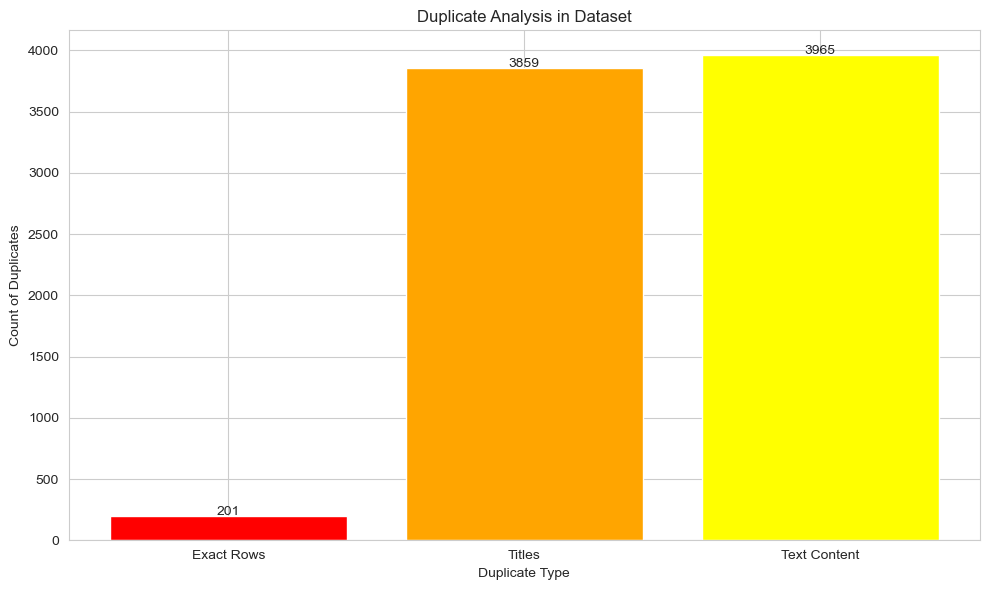

In [ ]:
# 6. Visualize the duplicates
plt.figure(figsize=(10, 6))
duplicate_types = ['Exact Rows', 'Titles', 'Text Content']
duplicate_counts = [exact_duplicates, title_duplicates, text_duplicates]

plt.bar(duplicate_types, duplicate_counts, color=['red', 'orange', 'yellow'])
plt.title('Duplicate Analysis in Dataset')
plt.ylabel('Count of Duplicates')
plt.xlabel('Duplicate Type')
for i, count in enumerate(duplicate_counts):
    plt.text(i, count + 5, str(count), ha='center')
plt.tight_layout()
plt.show()

# 7. Show examples of conflicting titles
if len(conflicting_titles) > 0:
    print("\n📋 Examples of titles with conflicting labels:")
    sample_conflicts = conflicting_titles.sample(min(5, len(conflicting_titles)))
    for title in sample_conflicts.index:
        title_data = df[df['title'] == title][['title', 'label', 'subject']]
        print(f"Title: {title}")
        display(title_data.head())
        print("-" * 50)


[🔝 Back to Top](#-01_edainb-fake-news-dataset-exploration)



---

## **🎯 4. Target Variable Analysis: `label`**

### **4.1. Main Dataset Label Distribution**
*How balanced is our classification problem?*


In [41]:
# Count and percentage
label_counts = df['label'].value_counts()
label_percentages = df['label'].value_counts(normalize=True) * 100

print("MAIN DATASET - LABEL DISTRIBUTION:")
print("\nCount of real (1) vs. fake (0) news:")
print(label_counts)
print("\nPercentages:\n", label_percentages.round(2))


MAIN DATASET - LABEL DISTRIBUTION:

Count of real (1) vs. fake (0) news:
label
1    19999
0    19943
Name: count, dtype: int64

Percentages:
 label
1    50.07
0    49.93
Name: proportion, dtype: float64


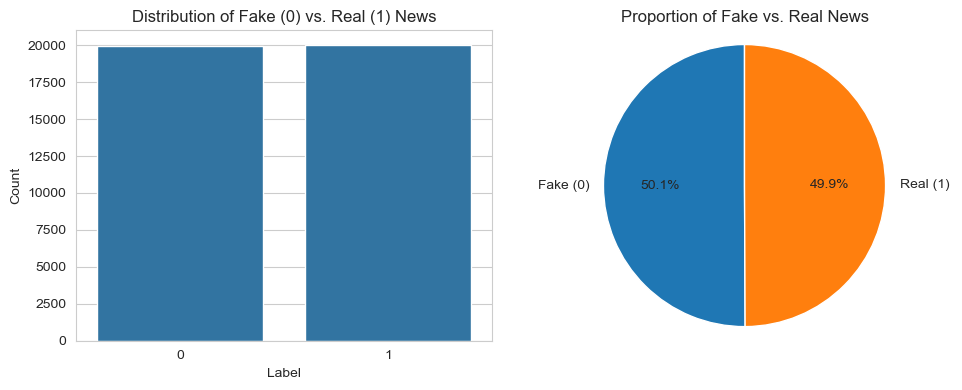

In [42]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Count plot
sns.countplot(x='label', data=df, ax=ax1)
ax1.set_title('Distribution of Fake (0) vs. Real (1) News')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')

# Pie chart
ax2.pie(label_counts, labels=['Fake (0)', 'Real (1)'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Proportion of Fake vs. Real News')
ax2.axis('equal')

plt.tight_layout()
plt.show()


***The Target Variable - The "Answer Key"***

`This Dataset has a balanced label`

### **4.2. Validation Dataset Label Check**
*What placeholder values does our validation set use?*


In [43]:
# Validation set has placeholder labels (2), so we just check the count
print("VALIDATION DATASET - LABEL PLACEHOLDER:")
print("Label value counts:\n", val_df['label'].value_counts())

VALIDATION DATASET - LABEL PLACEHOLDER:
Label value counts:
 label
2    4956
Name: count, dtype: int64



[🔝 Back to Top](#-01_edainb-fake-news-dataset-exploration)

---

## **📊 5. Categorical Variable Analysis: `subject`**

### **5.1. Main Dataset Subject Analysis**
*What topics do we have and how do they relate to fake/real news?*


In [44]:
print("MAIN DATASET - SUBJECT ANALYSIS:")
print("Unique subjects:", df['subject'].unique())
print("\nCount per subject:")
print(df['subject'].value_counts())


MAIN DATASET - SUBJECT ANALYSIS:
Unique subjects: ['politicsNews' 'worldnews' 'News' 'politics' 'Government News'
 'left-news']

Count per subject:
subject
politicsNews       11272
News                9050
worldnews           8727
politics            6841
left-news           2482
Government News     1570
Name: count, dtype: int64


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_53796/258284092.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subject_plot.set_xticklabels(subject_plot.get_xticklabels(), rotation=45)


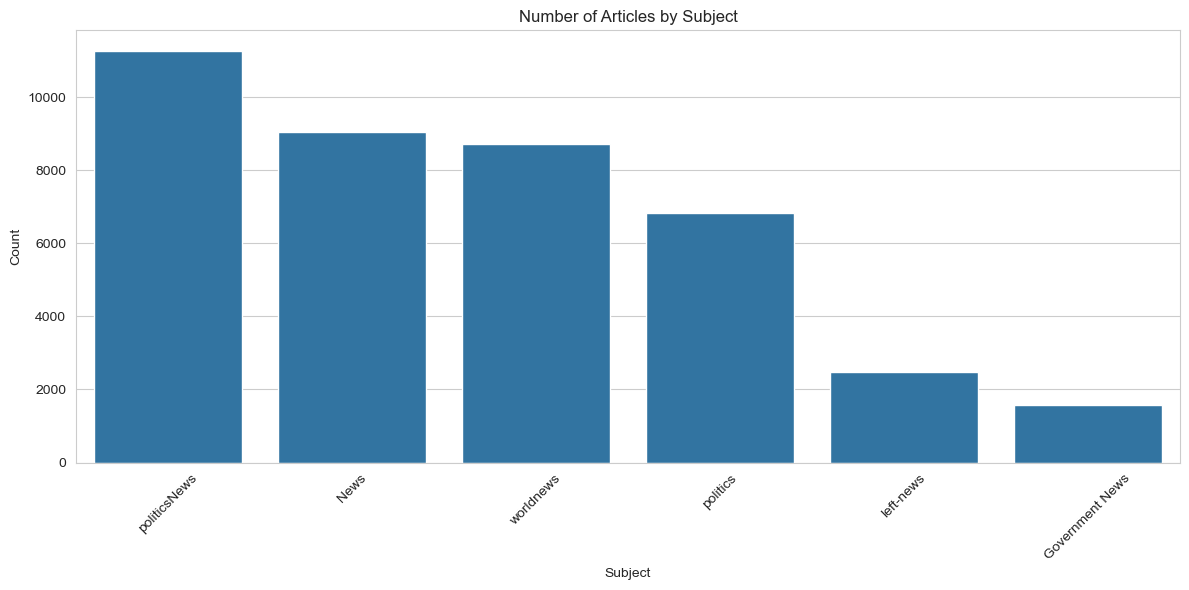


SUBJECT vs LABEL RELATIONSHIP (Percentage):


label,0,1
subject,,
Government News,100.0,0.0
News,100.0,0.0
left-news,100.0,0.0
politics,100.0,0.0
politicsNews,0.0,100.0
worldnews,0.0,100.0


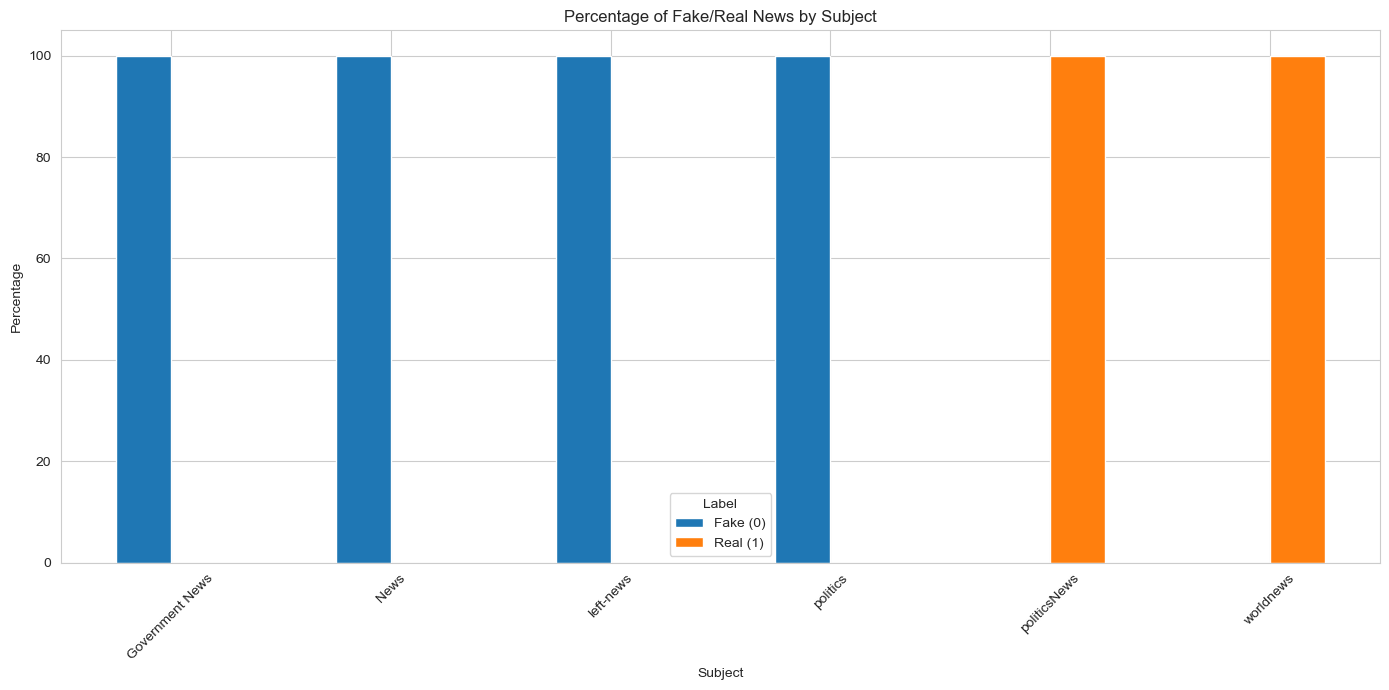

In [45]:
# Visualization
plt.figure(figsize=(12, 6))
subject_plot = sns.countplot(x='subject', data=df, order=df['subject'].value_counts().index)
subject_plot.set_xticklabels(subject_plot.get_xticklabels(), rotation=45)
plt.title('Number of Articles by Subject')
plt.ylabel('Count')
plt.xlabel('Subject')
plt.tight_layout()
plt.show()

# Subject vs Label relationship
subject_label_ct = pd.crosstab(df['subject'], df['label'])
subject_label_percent = subject_label_ct.div(subject_label_ct.sum(axis=1), axis=0) * 100

print("\nSUBJECT vs LABEL RELATIONSHIP (Percentage):")
display(subject_label_percent.round(2))

# Visualization
subject_label_percent.plot(kind='bar', figsize=(14, 7))
plt.title('Percentage of Fake/Real News by Subject')
plt.xlabel('Subject')
plt.ylabel('Percentage')
plt.legend(title='Label', labels=['Fake (0)', 'Real (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **5.2. Validation Dataset Subject Comparison**
*Does the validation set have the same subjects?*


In [46]:
print("VALIDATION DATASET - SUBJECT COMPARISON:")
print("Unique subjects:", val_df['subject'].unique())
print("\nCount per subject:")
print(val_df['subject'].value_counts())

# Check if validation has the same subjects as main dataset
main_subjects = set(df['subject'].unique())
val_subjects = set(val_df['subject'].unique())

print(f"\nSubjects in main but not in validation: {main_subjects - val_subjects}")
print(f"Subjects in validation but not in main: {val_subjects - main_subjects}")

print(f"\nSubjects in BOTH datasets: {main_subjects & val_subjects}")


VALIDATION DATASET - SUBJECT COMPARISON:
Unique subjects: ['worldnews' 'left-news' 'US_News' 'Middle-east']

Count per subject:
subject
left-news      1977
worldnews      1418
US_News         783
Middle-east     778
Name: count, dtype: int64

Subjects in main but not in validation: {'politicsNews', 'News', 'Government News', 'politics'}
Subjects in validation but not in main: {'US_News', 'Middle-east'}

Subjects in BOTH datasets: {'worldnews', 'left-news'}


In [47]:
print(f"Subjects in validation but not in main: {val_subjects & main_subjects}")


Subjects in validation but not in main: {'worldnews', 'left-news'}



[🔝 Back to Top](#01_edainb-fake-news-dataset-exploration)

---

## **📝 6. Text Analysis: `title` and `text` Columns**

### **6.1. Text Length Analysis**
*Do fake and real news have different length patterns?*


TEXT LENGTH SUMMARY STATISTICS:

Title Character Length:
 count    39942.000000
mean        79.774723
std         24.811136
min          8.000000
25%         63.000000
50%         73.000000
75%         90.000000
max        286.000000
Name: title_length, dtype: float64

Title Word Count:
 count    39942.000000
mean        12.392870
std          4.038761
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title_word_count, dtype: float64

Text Character Length:
 count    39942.000000
mean      2384.637875
std       1765.895463
min          1.000000
25%       1259.000000
50%       2197.000000
75%       3069.000000
max      49705.000000
Name: text_length, dtype: float64

Text Word Count:
 count    39942.000000
mean       391.735867
std        286.378195
min          0.000000
25%        207.000000
50%        363.500000
75%        506.000000
max       7033.000000
Name: text_word_count, dtype: float64


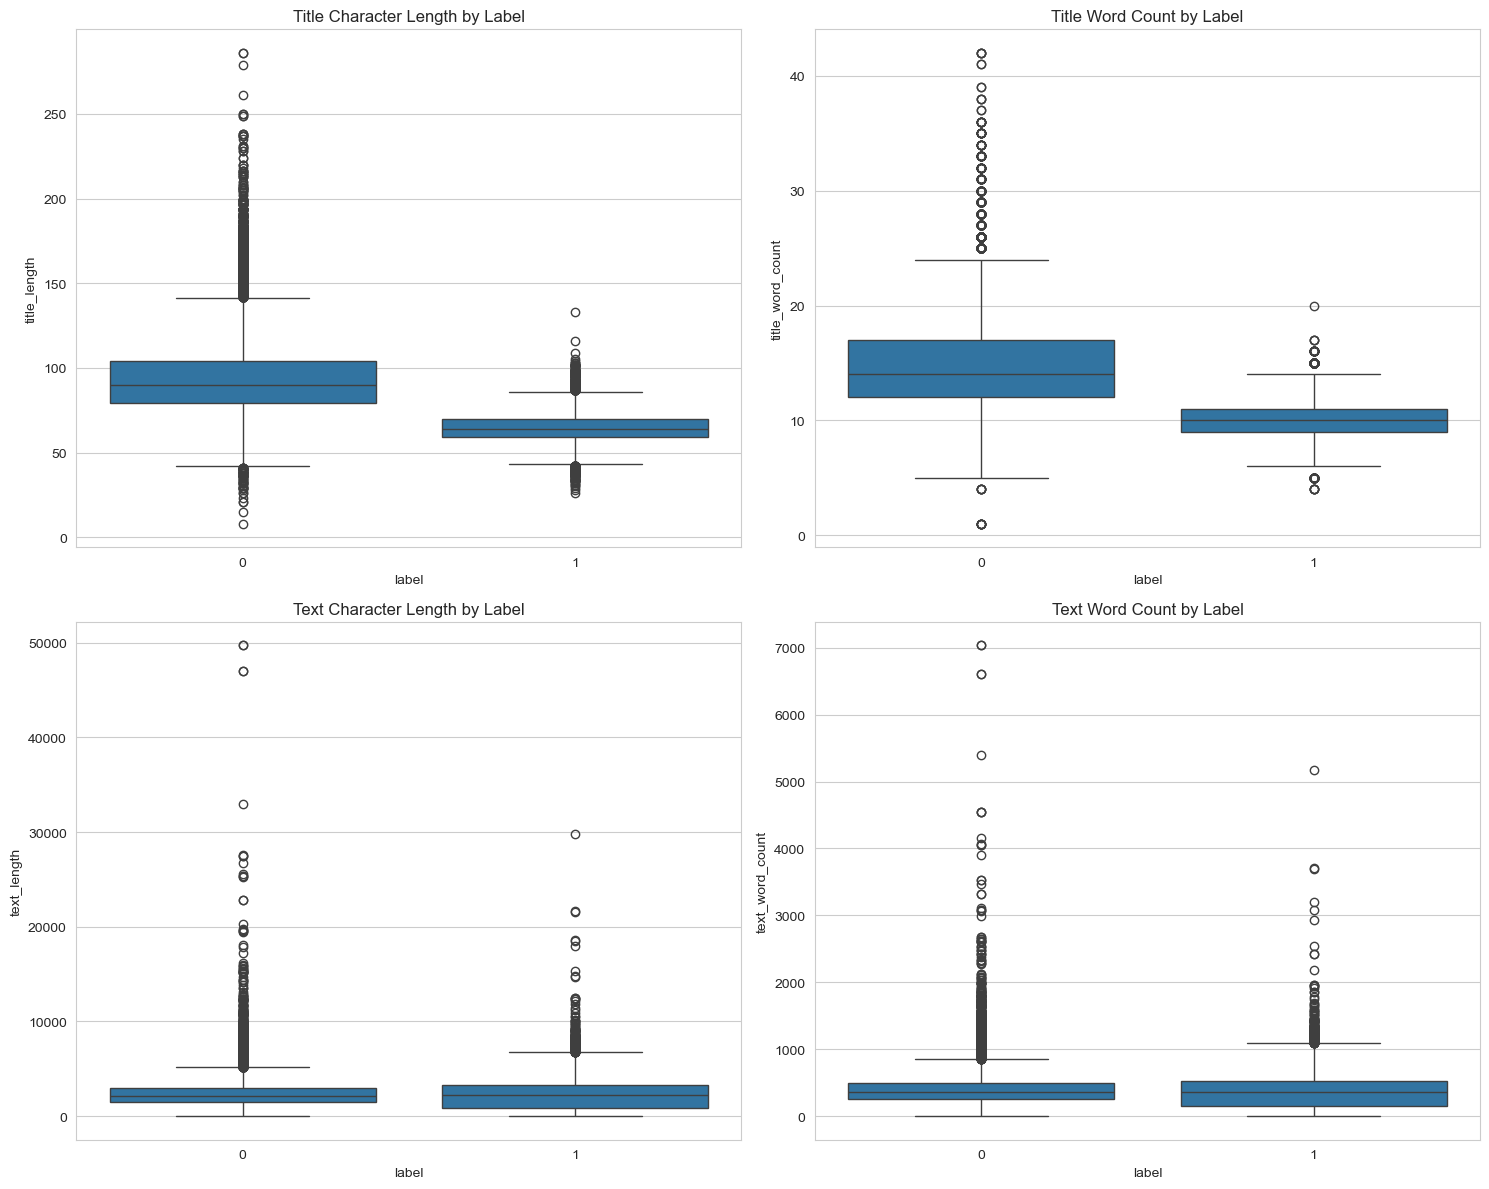

In [48]:
# Create new features for text length
df['title_length'] = df['title'].str.len()
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['text_length'] = df['text'].str.len()
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Summary statistics
print("TEXT LENGTH SUMMARY STATISTICS:")
print("\nTitle Character Length:\n", df['title_length'].describe())
print("\nTitle Word Count:\n", df['title_word_count'].describe())
print("\nText Character Length:\n", df['text_length'].describe())
print("\nText Word Count:\n", df['text_word_count'].describe())

# Compare length by label
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Title length by label
sns.boxplot(x='label', y='title_length', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Title Character Length by Label')

sns.boxplot(x='label', y='title_word_count', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Title Word Count by Label')

# Text length by label
sns.boxplot(x='label', y='text_length', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Text Character Length by Label')

sns.boxplot(x='label', y='text_word_count', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Text Word Count by Label')

plt.tight_layout()
plt.show()


### **6.2. Word Frequency Analysis**
*What words are most common in each category?*

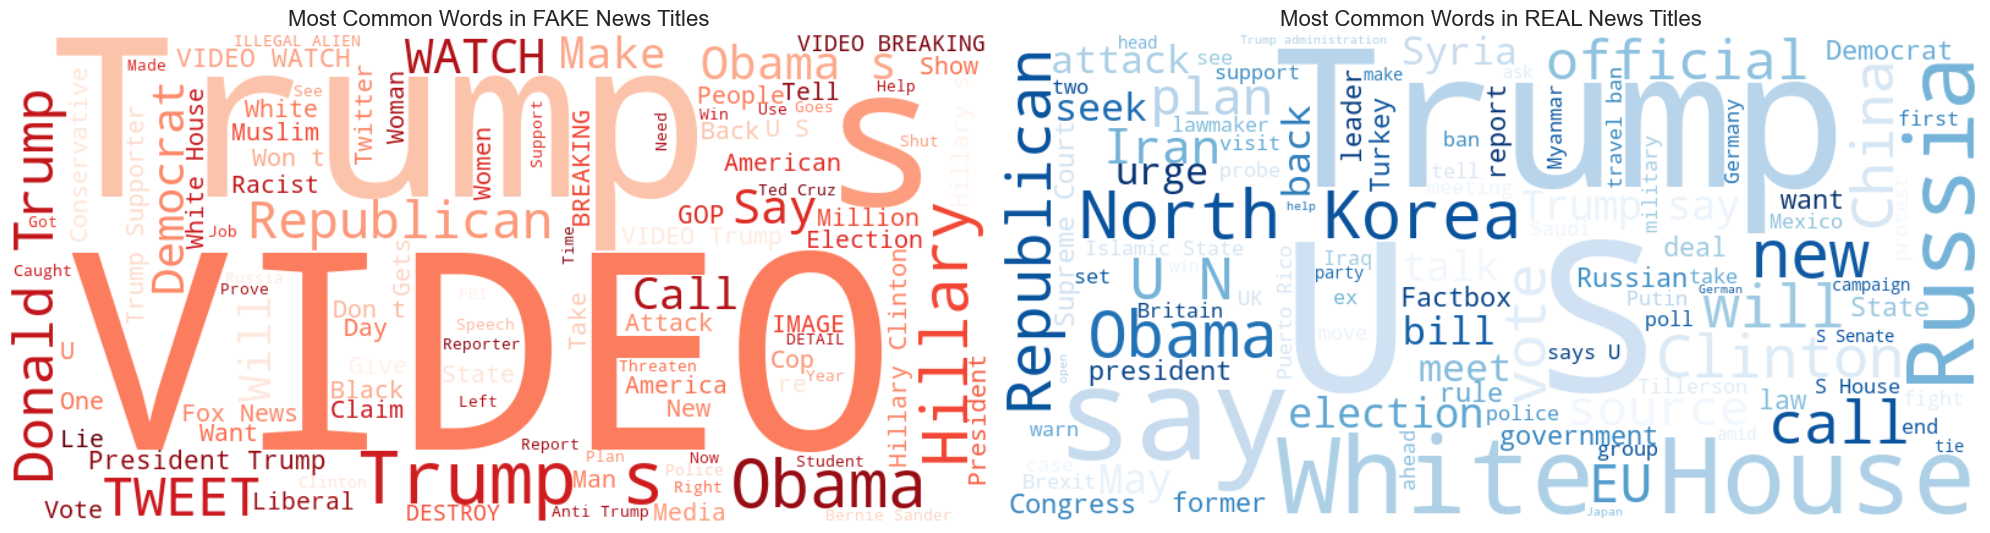

In [49]:
# Separate fake and real news
fake_news = df[df['label'] == 0]
real_news = df[df['label'] == 1]

# Generate word clouds
fake_title_text = ' '.join(fake_news['title'].dropna().astype(str))
real_title_text = ' '.join(real_news['title'].dropna().astype(str))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Fake news word cloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', 
                          colormap='Reds', max_words=100).generate(fake_title_text)
ax1.imshow(wordcloud_fake, interpolation='bilinear')
ax1.set_title('Most Common Words in FAKE News Titles', fontsize=16)
ax1.axis('off')

# Real news word cloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', 
                          colormap='Blues', max_words=100).generate(real_title_text)
ax2.imshow(wordcloud_real, interpolation='bilinear')
ax2.set_title('Most Common Words in REAL News Titles', fontsize=16)
ax2.axis('off')

plt.tight_layout()
plt.show()


### **6.3. Text Quality Check**
*Do we have any data quality issues?*

In [50]:
# Check for empty or very short texts
print("TEXT QUALITY CHECK:")
print(f"Number of empty titles: {(df['title'].str.strip() == '').sum()}")
print(f"Number of very short titles (<5 chars): {(df['title_length'] < 5).sum()}")
print(f"Number of empty text fields: {(df['text'].str.strip() == '').sum()}")

# Sample some titles to understand the data structure
print("\nSAMPLE TITLES FROM EACH CATEGORY:")
print("Fake news samples:")
for title in fake_news['title'].head(5):
    print(f"  - {title}")
    
print("\nReal news samples:")
for title in real_news['title'].head(5):
    print(f"  - {title}")


TEXT QUALITY CHECK:
Number of empty titles: 0
Number of very short titles (<5 chars): 0
Number of empty text fields: 610

SAMPLE TITLES FROM EACH CATEGORY:
Fake news samples:
  -  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
  -  Drunk Bragging Trump Staffer Started Russian Collusion Investigation
  -  Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’
  -  Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)
  -  Pope Francis Just Called Out Donald Trump During His Christmas Speech

Real news samples:
  - As U.S. budget fight looms, Republicans flip their fiscal script
  - U.S. military to accept transgender recruits on Monday: Pentagon
  - Senior U.S. Republican senator: 'Let Mr. Mueller do his job'
  - FBI Russia probe helped by Australian diplomat tip-off: NYT
  - Trump wants Postal Service to charge 'much more' for Amazon shipments



[🔝 Back to Top](#-01_edainb-fake-news-dataset-exploration)

---

## **📅 7. Date Analysis**

### **7.1. Main Dataset Date Analysis**
*What time period does our data cover?*

In [51]:
# Clean date strings by removing extra spaces
df['date_clean'] = df['date'].str.strip()
val_df['date_clean'] = val_df['date'].str.strip()

# Function to parse dates with multiple formats
def parse_dates_robust(date_series):
    """Parse dates with multiple format support"""
    # Try different date formats
    formats = [
        '%B %d, %Y',      # December 20, 2017
        '%d-%b-%y',       # 19-Feb-18
        '%Y-%m-%d',       # 2017-12-20
        '%m/%d/%Y',       # 12/20/2017
        '%d/%m/%Y',       # 20/12/2017
    ]
    parsed_dates = pd.Series([pd.NaT] * len(date_series), index=date_series.index)
    for fmt in formats:
        try:
            # Try to parse with current format
            temp_parsed = pd.to_datetime(date_series, format=fmt, errors='coerce')
            # Update only the ones that weren't parsed yet
            mask = parsed_dates.isna() & temp_parsed.notna()
            parsed_dates[mask] = temp_parsed[mask]
        except:
            continue
    # Try pandas automatic parsing for any remaining
    remaining_mask = parsed_dates.isna()
    if remaining_mask.any():
        try:
            auto_parsed = pd.to_datetime(date_series[remaining_mask], errors='coerce')
            parsed_dates[remaining_mask] = auto_parsed
        except:
            pass
    return parsed_dates

print(parse_dates_robust(df['date_clean']))

0       2017-12-31
1       2017-12-29
2       2017-12-31
3       2017-12-30
4       2017-12-29
           ...    
39937   2016-09-22
39938   2016-09-22
39939   2016-09-21
39940   2016-09-21
39941   2016-09-21
Length: 39942, dtype: datetime64[ns]


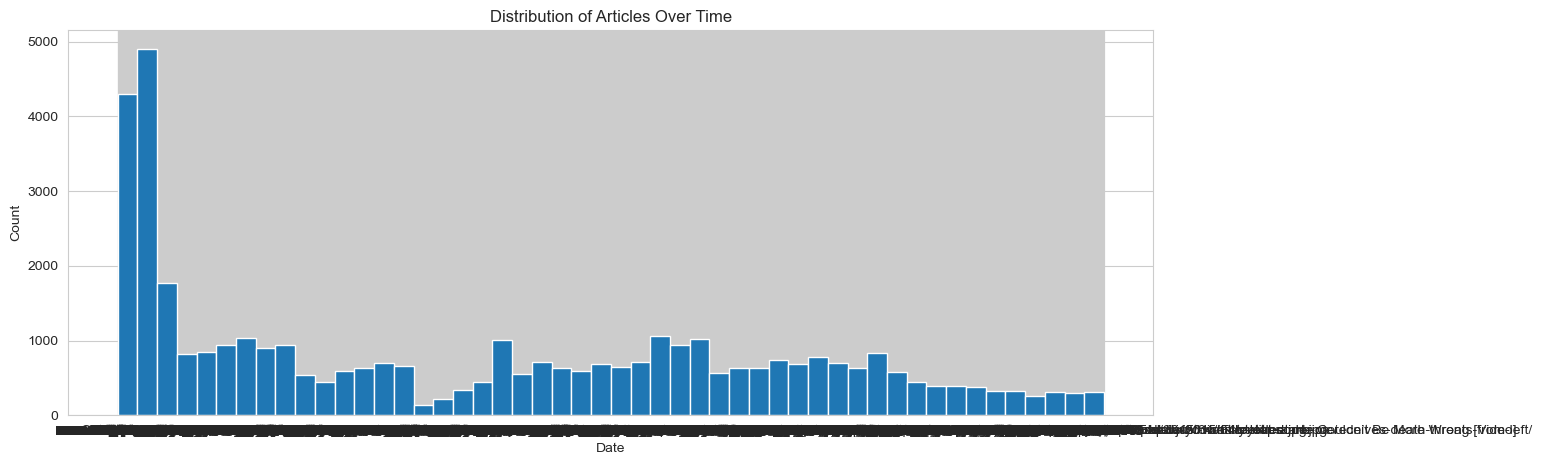

In [52]:
# print("MAIN DATASET - DATE ANALYSIS:")
# # Convert to datetime
# df['date'] = pd.to_datetime(df['date'], errors='coerce')

# # Check for invalid dates
# print(f"Number of invalid/missing dates: {df['date'].isnull().sum()}")

# # Date range
# print(f"Date range: {df['date'].min()} to {df['date'].max()}")

# Distribution over time (if dates are valid)
if df['date'].notnull().sum() > 0:
    plt.figure(figsize=(14, 5))
    df['date'].hist(bins=50)
    plt.title('Distribution of Articles Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()


### **7.2. Validation Dataset Date Check**
*Does the validation set cover the same time period?*


In [53]:
print("VALIDATION DATASET - DATE CHECK:")
val_df['date'] = pd.to_datetime(val_df['date'], errors='coerce')
print(f"Number of invalid/missing dates: {val_df['date'].isnull().sum()}")
print(f"Date range: {val_df['date'].min()} to {val_df['date'].max()}")


VALIDATION DATASET - DATE CHECK:
Number of invalid/missing dates: 3538
Date range: 2017-08-21 00:00:00 to 2017-09-21 00:00:00


<a id='date-diagnosis'></a>

### **🔍 7.3. Deep Dive: Diagnosing Invalid Dates**

We found **19,943 invalid dates**! Let's investigate the raw data to understand why `pd.to_datetime()` failed to convert them.

### **Strategy:**
1.  **Find the invalid rows:** Isolate the rows where the date conversion failed.
2.  **Look at the raw values:** See what the actual string values look like.
3.  **Look for patterns:** Are they all in a different format? Are they just garbage data?


In [54]:
print("MAIN DATASET - DATE ANALYSIS:")
print("=" * 50)

# First, let's see how many dates we're dealing with
total_dates = len(df)
print(f"Total rows in dataset: {total_dates}")

# Convert to datetime and find problematic dates
df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')
invalid_dates = df['date_parsed'].isnull()
print(f"Number of invalid/missing dates: {invalid_dates.sum()}")
print(f"Percentage of invalid dates: {(invalid_dates.sum() / total_dates * 100):.2f}%")

# Let's examine the invalid date entries
print("\n" + "=" * 50)
print("INVESTIGATING INVALID DATES:")
print("=" * 50)

# Get the original date values that failed to parse
invalid_date_values = df.loc[invalid_dates, 'date']
print("Sample of invalid date values (first 20):")
print(invalid_date_values.head(20).tolist())

# Check if there are any obvious patterns in the invalid dates
print(f"\nUnique invalid date values (first 50):")
print(invalid_date_values.unique()[:50])

# Let's also check for empty strings or obvious placeholders
print(f"\nNumber of empty date strings: {(df['date'] == '').sum()}")
print(f"Number of NaN in original date: {df['date'].isna().sum()}")

# Check for other common issues
print(f"\nDates containing 'NaN' string: {df['date'].astype(str).str.contains('NaN', case=False).sum()}")
print(f"Dates containing 'null' string: {df['date'].astype(str).str.contains('null', case=False).sum()}")

# Check the valid dates range
valid_dates = df['date_parsed'].dropna()
if len(valid_dates) > 0:
    print("\n" + "=" * 50)
    print("VALID DATES ANALYSIS:")
    print("=" * 50)
    print(f"Date range of VALID dates: {valid_dates.min()} to {valid_dates.max()}")
    print(f"Number of valid dates: {len(valid_dates)}")
    
    # Check distribution by year
    print("\nValid dates by year:")
    print(valid_dates.dt.year.value_counts().sort_index())

MAIN DATASET - DATE ANALYSIS:
Total rows in dataset: 39942
Number of invalid/missing dates: 19943
Percentage of invalid dates: 49.93%

INVESTIGATING INVALID DATES:
Sample of invalid date values (first 20):
['December 31, 2017', 'December 31, 2017', 'December 30, 2017', 'December 29, 2017', 'December 25, 2017', 'December 25, 2017', 'December 23, 2017', 'December 23, 2017', 'December 22, 2017', 'December 21, 2017', 'December 21, 2017', 'December 21, 2017', 'December 21, 2017', 'December 20, 2017', 'December 20, 2017', 'December 20, 2017', 'December 19, 2017', 'December 17, 2017', 'December 17, 2017', 'December 16, 2017']

Unique invalid date values (first 50):
['December 31, 2017' 'December 30, 2017' 'December 29, 2017'
 'December 25, 2017' 'December 23, 2017' 'December 22, 2017'
 'December 21, 2017' 'December 20, 2017' 'December 19, 2017'
 'December 17, 2017' 'December 16, 2017' 'December 13, 2017'
 'December 12, 2017' 'December 11, 2017' 'December 10, 2017'
 'December 9, 2017' 'Decembe

In [55]:
# Create a mask for rows where the date conversion failed
invalid_date_mask = df['date'].isnull()

# How many invalid dates do we have?
print(f"Number of rows with invalid dates: {invalid_date_mask.sum()}")
print(f"Sample of raw 'date' strings that caused errors:")

# Get the original raw date strings from the invalid rows
# We use .loc to get the original values from the ORIGINAL dataframe
invalid_raw_dates = df.loc[invalid_date_mask, 'date']

# Display a sample of these problematic date strings
sample_invalid_dates = invalid_raw_dates.head(20)
for i, date_str in enumerate(sample_invalid_dates):
    print(f"Row {invalid_raw_dates.index[i]}: '{date_str}'")

Number of rows with invalid dates: 0
Sample of raw 'date' strings that caused errors:


In [56]:
# Pandas' infer_datetime_format might help, or use dayfirst=True
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')
# Or if day comes first (e.g., 31-12-2016)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_53796/3772619018.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


In [57]:
df['date'] = pd.to_datetime(df['date'], unit='s', errors='coerce')

In [58]:
# After applying the correct fix, check again
print(f"Number of invalid dates after fix: {df['date'].isnull().sum()}")
print(f"New date range: {df['date'].min()} to {df['date'].max()}")

Number of invalid dates after fix: 19943
New date range: 2016-01-13 00:00:00 to 2017-12-31 00:00:00



[🔝 Back to Top](#-01_edainb-fake-news-dataset-exploration)

---

## **💡 8. Key Findings & Recommendations**

### **Summary of Findings:**
1.  **Label Distribution:** [Balanced/Imbalanced] = `balanced`
2.  **Subject Patterns:** [Which subjects are mostly fake/real] - `Subjects are extreme biased: 100% fake or real`
3.  **Text Characteristics:** [Difference in length/vocabulary] - [Note your finding]
4.  **Date Issues:** [Any problems with dates] - [Note your finding]
5.  **Validation Set Compatibility:** [Similar/Different from main data] - [Note your finding]

### **Recommendations for Data Cleaning:**
1.  **Text Cleaning Needed:** [Based on word cloud analysis]
2.  **Handling Missing Values:** [Based on null value check]
3.  **Date Processing:** [Based on date analysis]
4.  **Subject Encoding:** [Based on subject analysis]

### **Next Steps:**
1.  Proceed to create data cleaning functions in `src/data_cleaning.py`
2.  Focus on [most important cleaning tasks based on EDA]
3.  Consider using [specific features] in modeling based on patterns found

[🔝 Back to Top](#-01_edainb-fake-news-dataset-exploration)

---

## Tests: